# Math  1376: Programming for Data Science
---

In [1]:
import numpy as np #We will use numpy in this lecture
import matplotlib.pyplot as plt
%matplotlib inline

## Lecture 4: Some useful applications of Lectures 1-3

In this lecture, we will now pull together material across our first three lectures to solve some practical problems. 

You may find it useful to review those lectures beforehand or just simply open the notebooks corresponding to each lecture as necessary. 

While there are a seemingly endless number of practical problems we can attempt to solve with what we have learned so far, we will focus on three ubiquitous problems in the computational sciences.

- Root-finding. 
- Numerical integration.
- Optimization.

While we may make passing reference to certain calculus concepts, you do *not* need to know calculus to follow the narratives. (This, of course, is not to say that you should not seek to master calculus at some point.)

To make this lecture more manageable, we will break it up into two smaller notebooks focused on root-finding and numerical integration. The homework assignments will make connections to optimization.

In this notebook, we further break-up the root-finding into two types of algorithms to help you manage your time.

## Part (a): Root-finding

---

### What is it?

Simply put, given $f(x)$, a root of the function is some point $x=c$ such that $f(c)=0$. 

In other words, the ***roots*** of a function are the *inputs* that make the *output* equal to zero. 



### lambda functions for simple examples

We only mentioned these briefly in the last lecture in the context of list comprehensions. They do prove to be useful things in the context of this lecture. 

What is a `lambda` function? You can read quite a bit about such functions [here](https://www.w3schools.com/python/python_lambda.asp) or [here](https://realpython.com/python-lambda/).

The main takeaway is that if you have a simple type of "anonymous" function that you just need for a short period of time in your code, then a lambda function is probably right for you. It is *not* necessary to use these, but they are useful. 

A generic use syntax we care about would look something like this:

> ```f = lambda arguments : expression ```

See below for an example in the context of plotting the roots of a function `f` defined using a `lambda`.

Pay attention to how we use these types of functions in this lecture. They are completely anonymous functions that we pass as arguments into algorithms so that we can study how the algorithms perform on different types of functions without having to formally declare/create the functions elsewhere in the code.

In [2]:
f = lambda x : x**3 - x - 2  #defining f(x) = x^3-x-2

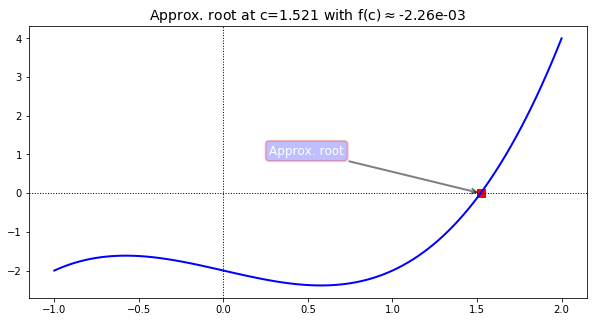

In [3]:
x = np.linspace(-1,2,100)

plt.figure(figsize=(10,5))
plt.plot(x,f(x),'b',linewidth=2) #plot of function f
plt.axvline(0, linewidth=1, linestyle=':', c='k') #plot typical y-axis
plt.axhline(0, linewidth=1, linestyle=':', c='k') #plot typical x-axis

c = 1.521 #approximate root
plt.scatter(c,f(c),s=70,c='r',marker='s') #plot approximate root

###########################################
## Now for some fancier plotting options ##
###########################################

# Let's create a text string for the title that formats certain floating point numbers
title_str = 'Approx. root at c=' + str(c) + r' with f(c)$\approx$' + '{:.2e}'.format(f(c))
plt.title(title_str, fontsize=14)

# Now let's annotate the plot with some text and arrows

# First, we define the dict (dictionary) of properties of items used in the annotation
bbox = dict(boxstyle="round", fc='b', color='r', alpha=0.25, linewidth=2) #This is the property dict for bounding box of text
arrowprops = dict(arrowstyle='->', facecolor='black', alpha=0.5, linewidth=2) #This is the property dict for the arrow

# Now annotate the plot
plt.annotate('Approx. root', fontsize=12, xy=(c,f(c)), xytext=(c-1.25,1), color='w',
             bbox = bbox, arrowprops=arrowprops);

Of course, the above just gives the *what* but not the *why*. 

### Why should we care?

Is there anything particularly important about a function being zero? In general, the answer is no. However, it depends on the function and the goals of the problem/application for which the function is some model of system behavior. 

Root-problems naturally arise in optimization of *smooth* phenomena. Before we discuss how this happens, let's address some terminology. What does *smooth* mean? For the purposes of this discussion, it means the function has as many *derivatives* as we require. What is a *derivative*? It is a concept from calculus, but here you can just think of it in very physical terms: the derivative of position as a function of time is velocity, the derivative of velocity as a function of time is acceleration, etc. (is there a physically meaningful derivative of acceleration? Yes! It is called the *jerk*, and I do not mean in the context "This lying jerk said we didn't need to know calculus!"). 

Anyway, suppose a function $h(t)$ describes the *height* of a launched projectile (e.g., a ball, missile, satellite, etc.) and we wish to know the times $t$ over some range of times $[t_0,t_f]$ when the projectile reaches its maximum and minimum heights. Let $f(t)$ denote the first derivative of $h(t)$. Then, the solutions to $f(t)=0$ (i.e., the roots of $f(t)$) give the potential times of maximum/minimum heights. We can then evaluate $h$ at all the roots of $f$ to determine what the heights are at these *critical* values. 

What if there are two launched projectiles with two height functions denoted by $h_1(t)$ and $h_2(t)$, and we are very interested when, or even *if*, there is a time where $h_1(t)=h_2(t)$ (i.e., is there a time where the objects collide)? This is an important question that arises in missile defense systems, satellite monitoring, and autonomous vehicle guidance systems. Well, define $f(t)=h_1(t)-h_2(t)$. Guess what, now you are interested in knowing whether or not $f(t)=0$. 

A simple variant of the previous problem description comes from the world of finance. Suppose $p(t)$ describes a model you develop for the price of an investment that you are considering (it could be in a savings/money market account, stock, or mutual fund to name just a few). You are probably interested in knowing when your model predicts the price to reach a certain target value, $p_{target}$, so that you can develop certain financial plans/goals around this time frame (e.g., having enough for a down payment on a car or house, take a vacation, or retire). 

### And these are solved how?

There are lots of algorithms that attempt to approximate the roots of a function, e.g., see https://en.wikipedia.org/wiki/Root-finding_algorithms. 

Most algorithms are *iterative*. Some are very easy to implement. Some are more difficult. Generally, the easier something is to implement, the more restrictive the conditions are under which we expect it to produce anything meaningful. 

While we are going to explore how to implement some of these algorithms as activities below, our learning objectives go beyond simple correct implementation. We will also consider what it means to do the following:

- *compare* different algorithms developed for solving the same generic problem;

- use this comparison to *choose* the "right" algorithm for solving a *specific* problem;

- develop a module that encodes various algorithms and a *wrapper* function that automatically chooses which algorithm to apply based on the inputs.

Some of this is done in-class while other parts are left for homework.

## Part (i): Bracketing methods (Approx. time: 1 hour)

## Bisection algorithm (https://en.wikipedia.org/wiki/Bisection_method)

---

The basic idea is best illustrated by an interactive demo.

We use widgets to create the interactivity. Widgets are very useful for illustrating concepts and exploring ideas.

In [4]:
# Usually place these at the top of a notebook if you know you are going to use widgets
# This cell only needs to be executed once
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [5]:
# This cell creates a plotting function that we use widgets to interact with in the following cell

def plot_bisection(f, a, b, x_min, x_max, grid_pts = 100):
    fig = plt.figure(figsize=(10,5))
    x = np.linspace(x_min,x_max,grid_pts)
    #Plot curve, axes, and points
    plt.plot(x,f(x),'b',linewidth=2) #plot of function f
    plt.axvline(0, linewidth=1, linestyle=':', c='k') #plot typical y-axis
    plt.axhline(0, linewidth=1, linestyle=':', c='k') #plot typical x-axis
    plt.scatter(a,f(a),s=70,c='k')
    plt.scatter(b,f(b),s=70,c='k') 
    c = (b+a)/2
    plt.scatter(c,f(c),s=70,c='r')
    #Add some info to the plot
    title_str = 'Approx. root is ' + '{:.3}'.format(c) + '. Use this to update interval [a,b].'
    plt.title(title_str, fontsize=14)
    # First, we define the dict (dictionary) of properties of items used in the annotation
    bbox_pt = dict(boxstyle='round', fc='0.9')
    bbox_text = dict(boxstyle="round", fc='b', color='r', alpha=0.25, linewidth=2) 
    arrowprops = dict(arrowstyle='->', facecolor='black', alpha=0.5, linewidth=2) 
    y_min, y_max = plt.ylim() #get min and max y-values from plot to offset annotations
    y_range = y_max - y_min
    x_range = x_max - x_min
    plt.annotate('Approx. root\nfrom one\nstep of bisec.\nalgorithm', fontsize=12, xy=(c,f(c)), 
                 xytext=(c-0.2*x_range,f(c)+0.25*y_range), color='w',
                 bbox = bbox_text, arrowprops=arrowprops)
    plt.annotate(r'$(a,f(a))$', fontsize=12, xy=(a,f(a)), xytext=(a+0.1*x_range,f(a)-0.25*y_range),
                 bbox=bbox_pt, arrowprops=arrowprops)
    plt.annotate(r'$(b,f(b))$', fontsize=12, xy=(b,f(b)), xytext=(b+0.1*x_range,f(b)-0.25*y_range),
                 bbox=bbox_pt, arrowprops=arrowprops)
    plt.annotate(r'$(c,f(c))$', fontsize=12, xy=(c,f(c)), xytext=(c+0.1*x_range,f(c)-0.25*y_range),
                 bbox=bbox_pt, arrowprops=arrowprops)
  

In [6]:
# This magic command below with help "flush" outputs to keep memory sizes small if this cell is repeatedly executed
%reset -f out

interact(plot_bisection, 
         f = widgets.fixed(lambda x: x**3-x-2),
         a = widgets.FloatSlider(value=0.5, min=-1, max=1.52, step=0.01),
         b = widgets.FloatSlider(value=1.75, min=1.53, max=2, step=0.01),
         x_min = widgets.fixed(-1),
         x_max = widgets.fixed(2),
         grid_pts = widgets.fixed(100))

Flushing output cache (0 entries)


interactive(children=(FloatSlider(value=0.5, description='a', max=1.52, min=-1.0, step=0.01), FloatSlider(valu…

<function __main__.plot_bisection(f, a, b, x_min, x_max, grid_pts=100)>

In [7]:
%reset -f out

interact(plot_bisection, 
         f = widgets.fixed(lambda x: np.sin(x**3-x-2)),
         a = widgets.FloatSlider(value=0.5, min=-1, max=1.52, step=0.01),
         b = widgets.FloatSlider(value=1.75, min=1.53, max=2, step=0.01),
         x_min = widgets.fixed(0),
         x_max = widgets.fixed(3),
         grid_pts = widgets.fixed(1000))

Flushing output cache (1 entries)


interactive(children=(FloatSlider(value=0.5, description='a', max=1.52, min=-1.0, step=0.01), FloatSlider(valu…

<function __main__.plot_bisection(f, a, b, x_min, x_max, grid_pts=100)>

## Activity

1. Create some code cells below.

2. In the first cell, create a function `my_bisection` that performs the bisection algorithm. Make sure it tests that the conditions are appropriate for running the bisection algorithm. The output should include an annotated plot of results. 

3. Test your code on some `lambda` functions.

## A bisection variant (https://en.wikipedia.org/wiki/Regula_falsi)

The basic idea of *regula falsi* (i.e., the false position method) is quite simple. It follows 3 steps starting with an initial guess of an interval $[a,b]$ that may contain a root. 

1. Make a straight line between $(a,f(a))$ and $(b,f(b))$. 

2. Compute the $x$-intercept of this line and call that point $c$. 

3. Compute $f(c)$ and compare the sign to $f(a)$ (or $f(b)$) and update the interval to either $[a,c]$ or $[c,b]$ depending on the result of this comparison.

Thus, this is just a variant of the bisection algorithm. The fundamental difference is that instead of using the midpoint of the interval $[a,b]$ as the guess for the root $c$, we use *interpolation* to approximate the function with a simple function (a line) for which it is easy to determine the root. The exact root of this approximating function is then an approximate root of the exact function.

## Activity

1. Create some code cells below.

2. Create a new function `plot_falsept` based on the `plot_bisection` function above to visualize the false point method using widgets. Visualize results with some `lambda` functions. 

3. Create a function `my_falsept` that performs the false point method. Make sure it tests that the conditions are appropriate for running this algorithm. The output show include an annotated plot of results.

4. Test your code on some `lambda` functions. 

## Activity

Use a mixture of markdown and code cells below to compare the bisection algorithm and false point method. 

## Part (ii) "Iterative" methods (Approx. time: 1 hour)

---

I imagine the incredulity you must feel. After all, weren't the above methods iterative?

Generally, iterative methods in root-finding problems refer to approaches that require an initial guess of the root instead of an initial interval/set containing the root. These approaches generally rely on defining an *auxiliary* function (i.e., an approximation to the function) that is constructed at the current guess in order to form the next "best" guess at the root of the true function. The false-point method somewhat hints at the basic idea of these methods and looks similar to the *secant* method.

One of the things you will need to consider is why some methods may be preferred to others in various scenarios. 

## The secant method (https://en.wikipedia.org/wiki/Secant_method)

This is perhaps best explained via an interactive demo. The wiki article actually includes Python code on this simple algorithm, which we copy below before the demo.

Can you see where this code can immediately have some difficulty? What would be a good initial check to ensure that the code doesn't "crash"? Should a similar check be done at the end of each iteration? 

In [8]:
#Copied from the wiki article
def secant_method(f, x0, x1, iterations):
    """Return the root calculated using the secant method."""
    for i in range(iterations):
        x2 = x1 - f(x1) * (x1 - x0) / float(f(x1) - f(x0))
        x0, x1 = x1, x2
    return x2

In [9]:
#Copied and edited from the wiki article for demo purposes
def secant_method_4_demo(f, x0, x1, iterations):
    """Return the root calculated using the secant method."""
    xs = [x0, x1]
    fs = [f(x0), f(x1)]
    for i in range(iterations):
        x2 = x1 - f(x1) * (x1 - x0) / float(f(x1) - f(x0))
        x0, x1 = x1, x2
        xs.append(x2)
        fs.append(f(x2))
    return xs, fs

In [10]:
def plot_secant(f, x0, x1, n,  x_min, x_max, grid_pts = 100):
    fig = plt.figure(figsize=(15,7.5))
    x = np.linspace(x_min,x_max,grid_pts)
    #Plot curve, axes, and points
    plt.plot(x,f(x),'b',linewidth=2) #plot of function f
    plt.axvline(0, linewidth=1, linestyle=':', c='k') #plot typical y-axis
    plt.axhline(0, linewidth=1, linestyle=':', c='k') #plot typical x-axis
    #Now perform the secant method
    xs, fs = secant_method_4_demo(f,x0,x1,n)
    for i in range(n):
        min_idx = np.argmin(xs[i:i+3])
        max_idx = np.argmax(xs[i:i+3])
        if (min_idx != 2) and (max_idx != 2):
            plt.plot([xs[i:i+3][min_idx], xs[i:i+3][max_idx]], 
                     [fs[i:i+3][min_idx], fs[i:i+3][max_idx]],
                     'k', linewidth=1, alpha=0.5)
        elif min_idx == 2:
            plt.plot([xs[i:i+3][min_idx], xs[i:i+3][max_idx]], 
                     [0, fs[i:i+3][max_idx]],
                     'k', linewidth=1, alpha=0.5)
        else:
            plt.plot([xs[i:i+3][min_idx], xs[i:i+3][max_idx]], 
                     [fs[i:i+3][min_idx], 0],
                     'k', linewidth=1, alpha=0.5)
    plt.plot([xs[i], xs[i]], [0, fs[i]], 'r', linewidth=1, alpha=0.5)
    plt.plot([xs[i+1], xs[i+1]], [0, fs[i+1]], 'r', linewidth=1, alpha=0.5)    
    plt.scatter(np.array(xs),0*np.array(xs))
    #Annotate the plot
    title_str = 'The n=' + str(n) + r' iter. of the sec. mtd. gives $f(x_{n+1})\approx$' + '{:.2e}'.format(fs[-1])
    plt.title(title_str, fontsize=18)
    bbox = dict(boxstyle="round", fc='b', color='r', alpha=0.25, linewidth=2)
    y_min, y_max = plt.ylim() #get min and max y-values from plot to offset annotations
    y_range = y_max - y_min
    for i in range(n+2):
        if fs[i] < 0:
            plt.annotate(r'$x_' + str(i) + '$', fontsize=12, xy=(xs[i],y_range*0.05), color='w', bbox = bbox)
        else:
            plt.annotate(r'$x_' + str(i) + '$', fontsize=12, xy=(xs[i],-y_range*0.05), color='w', bbox = bbox)

In [11]:
interact(plot_secant,
         f = widgets.fixed(lambda x: x**3-x-2),
         x0 = widgets.FloatSlider(value=0.5, min=0, max=2.5, step=0.01),
         x1 = widgets.FloatSlider(value=2, min=0, max=2.5, step=0.01),
         n = widgets.IntSlider(value=1, min=1, max=10),
         x_min = widgets.fixed(0),
         x_max = widgets.fixed(2.5),
         grid_pts = widgets.fixed(1000))

interactive(children=(FloatSlider(value=0.5, description='x0', max=2.5, step=0.01), FloatSlider(value=2.0, des…

<function __main__.plot_secant(f, x0, x1, n, x_min, x_max, grid_pts=100)>

## Activity

1. Create some code cells below.

2. Create a `my_secant` function that is *improved* in the sense that it checks for and avoids any potential errors that may occur during runtime. The output should include an annotated plot. Test on some `lambda` functions.

3. Use a mixture of code and markdown cells to compare the secant and false point methods across a variety of `lambda` functions.  
